In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load dataset
df = pd.read_csv('apple_products.csv')
display(df.head())

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [2]:
# Basic exploration
print("Shape of the DataFrame:", df.shape)
print("\nData Types of each column:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())
print("\nDataFrame info:\n")
df.info()

Shape of the DataFrame: (62, 11)

Data Types of each column:
 Product Name            object
Product URL             object
Brand                   object
Sale Price               int64
Mrp                      int64
Discount Percentage      int64
Number Of Ratings        int64
Number Of Reviews        int64
Upc                     object
Star Rating            float64
Ram                     object
dtype: object

Summary statistics:
           Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    1

In [20]:
# Unique values in key columns
print("\nUnique Product Names:", df['Product Name'].nunique())
print("Unique Brands:", df['Brand'].nunique())
print("Unique Star Ratings:", df['Star Rating'].unique())


Unique Product Names: 62
Unique Brands: 1
Unique Star Ratings: [4.6 4.5 4.7]


In [24]:
# Star Rating Distribution
print("\nDistribution of Star Ratings:\n", df['Star Rating'].value_counts())


Distribution of Star Ratings:
 Star Rating
4.6    37
4.5    20
4.7     5
Name: count, dtype: int64


## Data Cleaning & Feature Extraction

In [28]:
# Clean 'Sale Price'
df['Sale Price'] = df['Sale Price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Sale Price'] = pd.to_numeric(df['Sale Price'], errors='coerce')

In [31]:
# Extract 'iPhone Model' from 'Product Name'
df['iPhone Model'] = df['Product Name'].str.extract(r'iPhone (\S+)', expand=False)

In [34]:
# Convert data types
for col in ['Number Of Ratings', 'Number Of Reviews', 'Discount Percentage']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [39]:
# Check missing values
print("\nMissing values:\n", df[['iPhone Model', 'Number Of Ratings', 'Number Of Reviews', 'Discount Percentage']].isnull().sum())


Missing values:
 iPhone Model           0
Number Of Ratings      0
Number Of Reviews      0
Discount Percentage    0
dtype: int64


## 1. Top 10 Highest-Rated iPhones on Flipkart

,iPhone Model,Star Rating
20,11,4.7
17,11,4.7
16,11,4.7
15,11,4.7
14,11,4.7
0,8,4.6
29,12,4.6
32,12,4.6
35,12,4.6
36,12,4.6


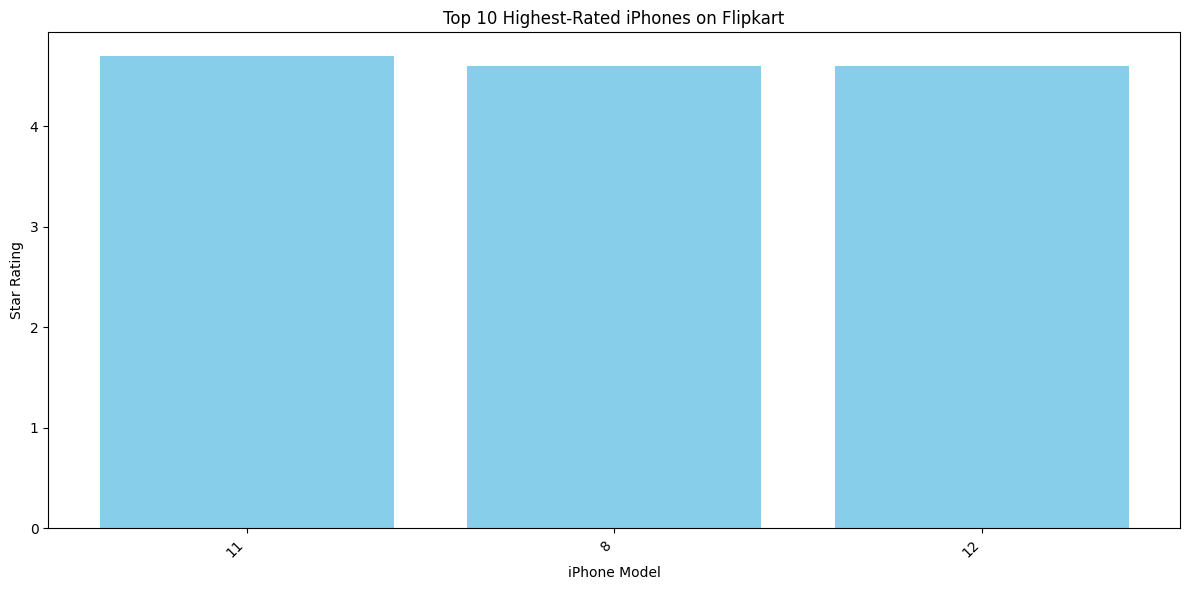

In [42]:
top_10_highest_rated = df.sort_values(by='Star Rating', ascending=False).dropna(subset=['iPhone Model']).head(10)
display(top_10_highest_rated[['iPhone Model', 'Star Rating']])

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(top_10_highest_rated['iPhone Model'], top_10_highest_rated['Star Rating'], color='skyblue')
plt.xlabel('iPhone Model')
plt.ylabel('Star Rating')
plt.title('Top 10 Highest-Rated iPhones on Flipkart')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Number of Ratings for the Highest-Rated iPhones

In [44]:
# Reusing top_10_highest_rated from above
display(top_10_highest_rated[['iPhone Model', 'Number Of Ratings']])

,iPhone Model,Number Of Ratings
20,11,1078
17,11,1078
16,11,1078
15,11,1078
14,11,1078
0,8,3431
29,12,2101
32,12,580
35,12,2101
36,12,2101


## 3. iPhone with the Highest Number of Reviews

In [48]:
iphone_highest_reviews = df.loc[df['Number Of Reviews'].idxmax()]
print(f"The iPhone model with the highest number of reviews is: {iphone_highest_reviews['iPhone Model']}")
display(iphone_highest_reviews)

The iPhone model with the highest number of reviews is: SE


Product Name           Apple iPhone SE (White, 256 GB) (Includes EarP...
Product URL            https://www.flipkart.com/apple-iphone-se-white...
Brand                                                              Apple
Sale Price                                                         44999
Mrp                                                                54900
Discount Percentage                                                   18
Number Of Ratings                                                  95909
Number Of Reviews                                                   8161
Upc                                                     MOBFRFXHPZCHAPEH
Star Rating                                                          4.5
Ram                                                                 2 GB
iPhone Model                                                          SE
Name: 23, dtype: object

## 4. Relationship Between Sale Price and Number of Ratings

Correlation between Sale Price and Number of Ratings: -0.7015


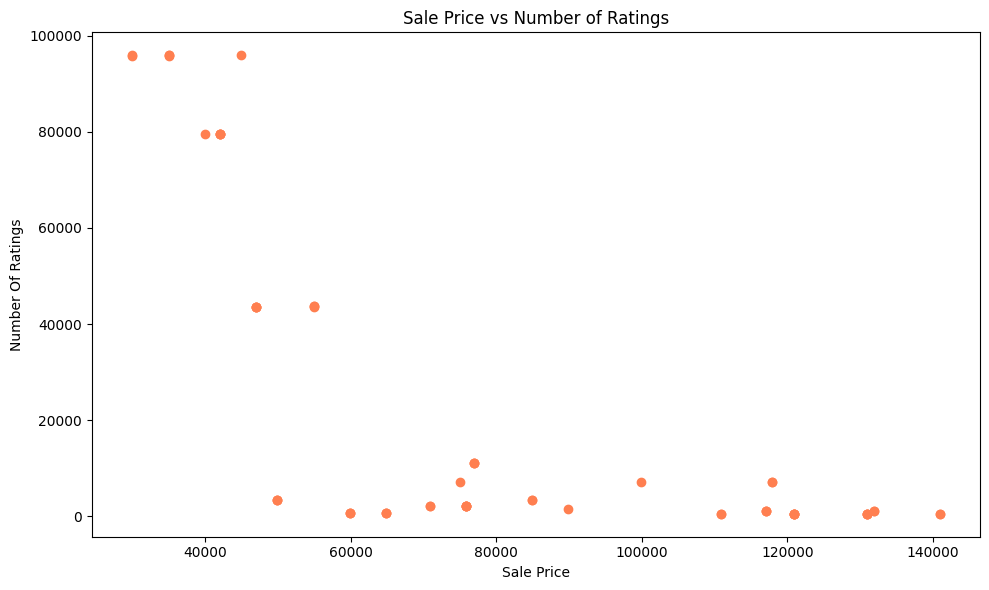

In [51]:
# Correlation
correlation_price_ratings = df['Sale Price'].corr(df['Number Of Ratings'])
print(f"Correlation between Sale Price and Number of Ratings: {correlation_price_ratings:.4f}")

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sale Price'], df['Number Of Ratings'], color='coral')
plt.xlabel('Sale Price')
plt.ylabel('Number Of Ratings')
plt.title('Sale Price vs Number of Ratings')
plt.tight_layout()
plt.show()

## 5. Relationship Between Discount Percentage and Number of Ratings

Correlation between Discount Percentage and Number of Ratings: 0.6848


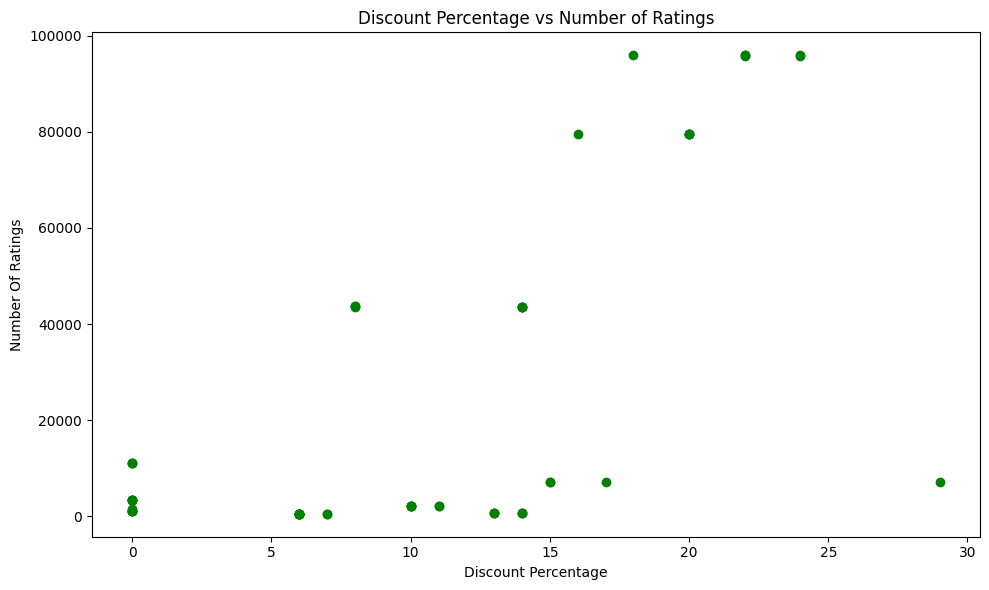

In [56]:
# Correlation
correlation_discount_ratings = df['Discount Percentage'].corr(df['Number Of Ratings'])
print(f"Correlation between Discount Percentage and Number of Ratings: {correlation_discount_ratings:.4f}")

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount Percentage'], df['Number Of Ratings'], color='green')
plt.xlabel('Discount Percentage')
plt.ylabel('Number Of Ratings')
plt.title('Discount Percentage vs Number of Ratings')
plt.tight_layout()
plt.show()

## 6. Least Expensive and Most Expensive iPhones with All Specifications

In [59]:
# Least Expensive iPhone
least_expensive = df.loc[df['Sale Price'].idxmin()]
print("Least Expensive iPhone Details:")
display(least_expensive)

# Most Expensive iPhone
most_expensive = df.loc[df['Sale Price'].idxmax()]
print("Most Expensive iPhone Details:")
display(most_expensive)

Least Expensive iPhone Details:


Product Name                              APPLE iPhone SE (White, 64 GB)
Product URL            https://www.flipkart.com/apple-iphone-se-white...
Brand                                                              Apple
Sale Price                                                         29999
Mrp                                                                39900
Discount Percentage                                                   24
Number Of Ratings                                                  95807
Number Of Reviews                                                   8154
Upc                                                     MOBFWQ6BGWDVGF3E
Star Rating                                                          4.5
Ram                                                                 2 GB
iPhone Model                                                          SE
Name: 52, dtype: object

Most Expensive iPhone Details:


Product Name                        APPLE iPhone 12 Pro (Silver, 512 GB)
Product URL            https://www.flipkart.com/apple-iphone-12-pro-s...
Brand                                                              Apple
Sale Price                                                        140900
Mrp                                                               149900
Discount Percentage                                                    6
Number Of Ratings                                                    542
Number Of Reviews                                                     42
Upc                                                     MOBFWBYZ5UY6ZBVA
Star Rating                                                          4.5
Ram                                                                 4 GB
iPhone Model                                                          12
Name: 24, dtype: object